# **Load Data and Libraries**

In [ ]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import tree

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

%matplotlib inline
fig=plt.figure(figsize=(18,6))

## others
import os

pd.options.display.max_rows=1000
pd.options.display.max_columns=300

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1T4-mRtvH_gf8nmedzLfCtOdXk7BxRmrc'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

link = 'https://drive.google.com/open?id=1laMZVHjAhIX1TqktIp27wy7mto6RYcsF'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


link = 'https://drive.google.com/open?id=11LYoHshka-BMc0hLd6HrxdJWa2hJG6v3'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('hotel.csv')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('country-keyword-list.csv')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Hotel_Bookings_Prepared.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1T4-mRtvH_gf8nmedzLfCtOdXk7BxRmrc
1laMZVHjAhIX1TqktIp27wy7mto6RYcsF
11LYoHshka-BMc0hLd6HrxdJWa2hJG6v3


<Figure size 1296x432 with 0 Axes>

# **Decision Tree**

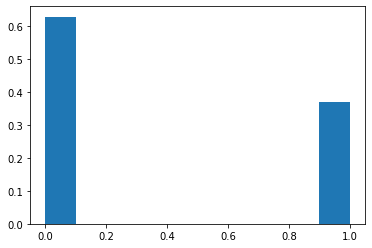

In [ ]:
hotel = pd.read_csv('Hotel_Bookings_Prepared.csv')
hotel.head()

canceled = list(hotel.is_canceled)
plt.hist(canceled, weights=np.ones(len(canceled)) / len(canceled))
plt.show()

In [ ]:
hotel.head()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_company,is_agent,is_diff_room_type,is_holiday,hotel_encoded,arrival_date_month_encoded,meal_encoded,market_segment_encoded,distribution_channel_encoded,customer_type_encoded,deposit_type_encoded,arrival_date_day_of_the_week_encoded,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,arrival_date_day_of_the_week_Friday,arrival_date_day_of_the_week_Monday,arrival_date_day_of_the_week_Saturday,arrival_date_day_of_the_week_Sunday,arrival_date_day_of_the_week_Thursday,arrival_date_day_of_the_week_Tuesday,arrival_date_day_of_the_week_Wednesday,continent_encoded,continent_Africa,continent_Antarctica,continent_Asia,continent_Australia,continent_Europe,continent_North America,continent_South America
0,0,0,0.464043,2015,27,1,0.0,0.00,0.036364,0.0,0.0,PRT,0,0.0,0.0,C,C,0.142857,NaN,NaN,0.0,0.001180,0.0,0,Check-Out,2015-07-01,False,True,False,False,1,5,0,3,1,2,0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,4,0,0,0,0,1,0,0
1,1,0,1.000000,2015,27,1,0.0,0.00,0.036364,0.0,0.0,PRT,0,0.0,0.0,C,C,0.190476,NaN,NaN,0.0,0.001180,0.0,0,Check-Out,2015-07-01,False,True,False,False,1,5,0,3,1,2,0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,4,0,0,0,0,1,0,0
2,2,0,0.009498,2015,27,1,0.0,0.02,0.018182,0.0,0.0,GBR,0,0.0,0.0,A,C,0.000000,NaN,NaN,0.0,0.015053,0.0,0,Check-Out,2015-07-02,False,True,True,False,1,5,0,3,1,2,0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,4,0,0,0,0,1,0,0
3,3,0,0.017639,2015,27,1,0.0,0.02,0.018182,0.0,0.0,GBR,0,0.0,0.0,A,A,0.000000,304.0,NaN,0.0,0.015053,0.0,0,Check-Out,2015-07-02,False,True,False,False,1,5,0,2,0,2,0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,4,0,0,0,0,1,0,0
4,4,0,0.018996,2015,27,1,0.0,0.04,0.036364,0.0,0.0,GBR,0,0.0,0.0,A,A,0.000000,240.0,NaN,0.0,0.019307,0.0,1,Check-Out,2015-07-03,False,True,False,False,1,5,0,6,3,2,0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,4,0,0,0,0,1,0,0


In [ ]:
# one hot encoding
hotel = pd.get_dummies(hotel, columns=['is_holiday','is_diff_room_type','is_agent','is_company'])

hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 95 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              119390 non-null  int64  
 1   is_canceled                             119390 non-null  int64  
 2   lead_time                               119390 non-null  float64
 3   arrival_date_year                       119390 non-null  int64  
 4   arrival_date_week_number                119390 non-null  int64  
 5   arrival_date_day_of_month               119390 non-null  int64  
 6   stays_in_weekend_nights                 119390 non-null  float64
 7   stays_in_week_nights                    119390 non-null  float64
 8   adults                                  119390 non-null  float64
 9   children                                119390 non-null  float64
 10  babies                                  1193

In [ ]:
hotel = hotel.drop(['Unnamed: 0','arrival_date_year','arrival_date_day_of_month',\
                    'country', 'agent', 'company', 'reservation_status', 'reservation_status_date', 'hotel_encoded',\
                    'arrival_date_month_encoded', 'meal_encoded', 'market_segment_encoded', 'distribution_channel_encoded',\
                    'continent_encoded','arrival_date_day_of_the_week_encoded','arrival_date_week_number',\
                    'deposit_type_encoded','customer_type_encoded','reserved_room_type','assigned_room_type',\
                    'continent_Australia','deposit_type_Refundable','customer_type_Group','market_segment_Complementary',\
                    'distribution_channel_GDS','market_segment_Aviation','distribution_channel_Undefined',\
                    'market_segment_Undefined','continent_Antarctica','is_agent_True','is_diff_room_type_False',\
                    'is_holiday_False','is_company_False']
                    ,axis=1)

# assign features
features = hotel.columns[1:].tolist()
label = hotel.columns[:1].tolist()

X = hotel[features]
y = hotel[label]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
hotel.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_TA/TO,customer_type_Contract,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,arrival_date_day_of_the_week_Friday,arrival_date_day_of_the_week_Monday,arrival_date_day_of_the_week_Saturday,arrival_date_day_of_the_week_Sunday,arrival_date_day_of_the_week_Thursday,arrival_date_day_of_the_week_Tuesday,arrival_date_day_of_the_week_Wednesday,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_South America,is_holiday_True,is_diff_room_type_True,is_company_True
0,0,0.464043,0.0,0.00,0.036364,0.0,0.0,0,0.0,0.0,0.142857,0.0,0.001180,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,1.000000,0.0,0.00,0.036364,0.0,0.0,0,0.0,0.0,0.190476,0.0,0.001180,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0.009498,0.0,0.02,0.018182,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.015053,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0.017639,0.0,0.02,0.018182,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.015053,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0.018996,0.0,0.04,0.036364,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.019307,0.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
hotel.corr()

number of nodes of model 1: 21085
Accuracy 0.8211533629282184
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     29989
           1       0.76      0.76      0.76     17767

    accuracy                           0.82     47756
   macro avg       0.81      0.81      0.81     47756
weighted avg       0.82      0.82      0.82     47756

Confusion Matrix 
 [[25670  4319]
 [ 4222 13545]]
ROC-AUC
AUC: 0.8118499353029133


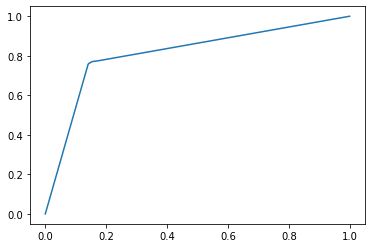

PR-AUC
PR-AUC: 0.8031280697732035


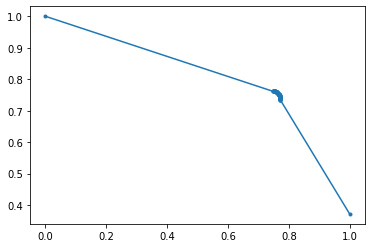

In [ ]:
# Model 1 (without pre-setting parameters)
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
treeObj1 = model1.tree_
print("number of nodes of model 1: " + str(treeObj1.node_count))
pred_test1 = model1.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test1,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test1))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test1))

########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = model1.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(metrics.auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = model1.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()

number of nodes of model 2: 399
Accuracy 0.8331518552642599
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.93      0.87     29989
           1       0.84      0.68      0.75     17767

    accuracy                           0.83     47756
   macro avg       0.84      0.80      0.81     47756
weighted avg       0.83      0.83      0.83     47756

Confusion Matrix 
 [[27753  2236]
 [ 5732 12035]]
ROC-AUC
AUC: 0.8985908170456668


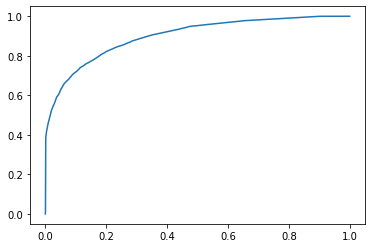

PR-AUC
PR-AUC: 0.8562283023867832


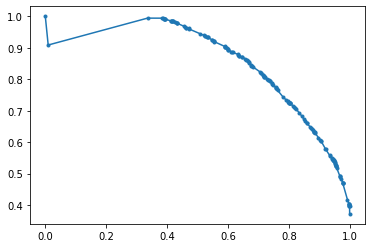

In [ ]:
# Model 2
######################################################################
########### max depth and leaf nodes generated by GridSearchCV #######
model2 = DecisionTreeClassifier(criterion='gini',max_depth=19,max_leaf_nodes=200)
model2.fit(X_train,y_train)
treeObj2 = model2.tree_
print("number of nodes of model 2: " + str(treeObj2.node_count))
pred_test2 = model2.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test2,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test2))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test2))


########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = model2.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(metrics.auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = model2.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
# model = DecisionTreeClassifier()

# CV
score_cv = cross_val_score(model,X_train,y_train,cv=10)

# Accuracy from cross validation
print('Average accuracy score is ' + str(score_cv.mean()))

# Grid Search CV
## define number to try out for max leaf nodes
num_leafs = [5,10,50,100,200]
depths = np.arange(1,10)

# Set param_grid
try_grid = [{'max_depth':depths,'max_leaf_nodes':num_leafs}]
print(try_grid)

# Define model with GridSearch CV
DTM = GridSearchCV(DecisionTreeClassifier(),param_grid=try_grid,cv=10)

# Fit mode with training data
DTM.fit(X_train,y_train)

# Find best parameter
print('best parameters: '+str(DTM.best_params_))

# Find accuracy from best parameters
print('best accuracy score: ' + str(DTM.best_score_))

# **Random Forest**

In [ ]:
hotel = pd.read_csv('Hotel_Bookings_Prepared.csv')
hotel.describe()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_encoded,arrival_date_month_encoded,meal_encoded,market_segment_encoded,distribution_channel_encoded,customer_type_encoded,deposit_type_encoded,arrival_date_day_of_the_week_encoded,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,arrival_date_day_of_the_week_Friday,arrival_date_day_of_the_week_Monday,arrival_date_day_of_the_week_Saturday,arrival_date_day_of_the_week_Sunday,arrival_date_day_of_the_week_Thursday,arrival_date_day_of_the_week_Tuesday,arrival_date_day_of_the_week_Wednesday,continent_encoded,continent_Africa,continent_Antarctica,continent_Asia,continent_Australia,continent_Europe,continent_North America,continent_South America
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.00000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,0.141128,2016.156554,27.165173,15.798241,0.048821,0.050006,0.033753,0.010389,0.000795,0.031912,0.003351,0.001904,0.010530,86.693382,189.266735,0.005936,0.020015,0.007815,0.571363,0.335539,5.490544,0.555742,4.928101,2.585317,2.137323,0.124893,2.852408,0.664461,0.335539,0.092880,0.116233,0.056789,0.067577,0.049661,0.106047,0.091624,0.082034,0.098760,0.056906,0.093475,0.088014,0.773180,0.006684,0.121141,0.089203,0.009791,0.001985,0.006223,0.044350,0.105587,0.165935,0.202856,0.473046,0.000017,0.055926,0.122665,0.001617,0.819750,0.000042,0.03414,0.004833,0.750591,0.210436,0.876464,0.122179,0.001357,0.164428,0.152199,0.151227,0.118444,0.161270,0.117254,0.135179,3.969269,0.009448,0.000017,0.026996,0.004305,0.916836,0.019390,0.023009
std,34465.068657,0.482918,0.144997,0.707476,13.605138,8.780829,0.052559,0.038166,0.010532,0.039856,0.009744,0.175767,0.032474,0.020798,0.031062,110.774548,131.655015,0.044999,0.009347,0.030661,0.792798,0.47218

In [ ]:
from sklearn.ensemble import RandomForestClassifier

hotel = pd.read_csv('Hotel_Bookings_Prepared.csv')

# one hot encoding
hotel = pd.get_dummies(hotel, columns=['is_holiday','is_diff_room_type','is_agent','is_company'])

# drop features
hotel = hotel.drop(['Unnamed: 0','arrival_date_year','arrival_date_day_of_month',\
                    'country', 'agent', 'company', 'reservation_status', 'reservation_status_date', 'hotel_encoded',\
                    'arrival_date_month_encoded', 'meal_encoded', 'market_segment_encoded', 'distribution_channel_encoded',\
                    'continent_encoded','arrival_date_day_of_the_week_encoded','arrival_date_week_number',\
                    'deposit_type_encoded','customer_type_encoded','reserved_room_type','assigned_room_type',\
                    'continent_Australia','deposit_type_Refundable','customer_type_Group','market_segment_Complementary',\
                    'distribution_channel_GDS','market_segment_Aviation','distribution_channel_Undefined',\
                    'market_segment_Undefined','continent_Antarctica','is_agent_True','is_diff_room_type_False',\
                    'is_holiday_False','is_company_False']
                    ,axis=1)

# assign features
features = hotel.columns[1:].tolist()
label = hotel.columns[:1].tolist()

X = hotel[features]
y = hotel[label]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# change target column to array
y_train = y_train.values.ravel()

#create a new random forest classifier
rf = RandomForestClassifier()

accuracy = cross_val_score (rf, X_train, y_train, cv=10).mean()


In [ ]:
#create a dictionary of all values we want to test for n_estimators, number of trees
## define number to try out for max leaf nodes
num_leafs = [5,10,50,100,200]
depths = np.arange(1,21)

params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, y_train)

#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)


Accuracy 0.8637448697545859
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.93      0.90     29989
           1       0.86      0.75      0.80     17767

    accuracy                           0.86     47756
   macro avg       0.86      0.84      0.85     47756
weighted avg       0.86      0.86      0.86     47756

Confusion Matrix 
 [[27847  2142]
 [ 4365 13402]]
ROC-AUC
AUC: 0.9305698078301213


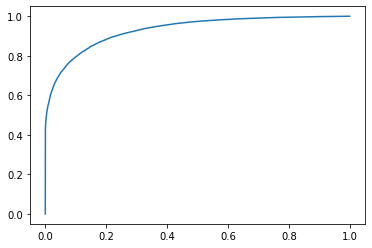

PR-AUC
PR-AUC: 0.9109985601410554


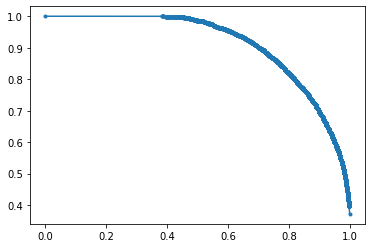

In [ ]:
# create best model of random forest in term of number of trees (which is 200)
rf_best = RandomForestClassifier(n_estimators = 200)

# fit the random forest
rf_best.fit(X_train,y_train)

pred_test = rf_best.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test))


########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = rf_best.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(metrics.auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = rf_best.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
# Return the feature importances (the higher, the more important the feature)
feature_importances_ = pd.Series(rf_best.feature_importances_,index=features).sort_values(ascending=False)
# print(rf_best.feature_importances_)
feature_importances_

lead_time                                 0.156756
adr                                       0.115937
deposit_type_Non Refund                   0.086760
deposit_type_No Deposit                   0.070055
total_of_special_requests                 0.061991
stays_in_week_nights                      0.045313
previous_cancellations                    0.038137
is_diff_room_type_True                    0.032582
stays_in_weekend_nights                   0.026376
required_car_parking_spaces               0.021708
booking_changes                           0.019828
adults                                    0.018790
market_segment_Online TA                  0.018024
customer_type_Transient                   0.015467
market_segment_Offline TA/TO              0.012578
market_segment_Groups                     0.012482
customer_type_Transient-Party             0.011450
children                                  0.009281
distribution_channel_TA/TO                0.009206
arrival_date_day_of_the_week_Th

In [ ]:
print(rf_best.estimators_)

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1486287339, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2102742991, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=

# **Draft**

Accuracy 0.8625722422313427
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89     29989
           1       0.86      0.75      0.80     17767

    accuracy                           0.86     47756
   macro avg       0.86      0.84      0.85     47756
weighted avg       0.86      0.86      0.86     47756

Confusion Matrix 
 [[27846  2143]
 [ 4420 13347]]
ROC-AUC
AUC: 0.92964293658017


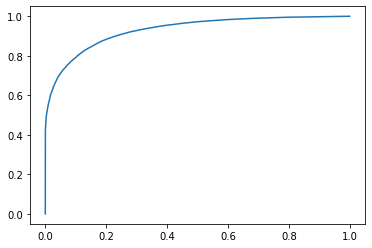

PR-AUC
PR-AUC: 0.9101219206679075


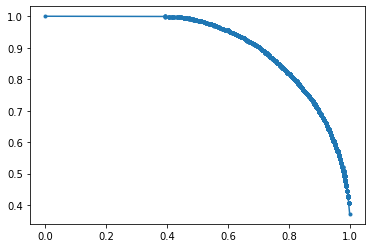

In [ ]:
from sklearn.ensemble import RandomForestClassifier

hotel = pd.read_csv('Hotel_Bookings_Prepared.csv')

# one hot encoding
hotel = pd.get_dummies(hotel, columns=['is_holiday','is_diff_room_type','is_agent','is_company'])

hotel = hotel.drop(['Unnamed: 0','arrival_date_year','arrival_date_day_of_month',\
                            'country', 'agent', 'company', 'reservation_status', 'reservation_status_date', 'hotel_encoded',\
                            'arrival_date_month_encoded', 'meal_encoded', 'market_segment_encoded', 'distribution_channel_encoded',\
                            'continent_encoded','arrival_date_day_of_the_week_encoded','arrival_date_week_number',\
                            'deposit_type_encoded','customer_type_encoded','reserved_room_type','assigned_room_type']\
                            ,axis=1)

# 'distribution_channel_Direct',
# 'arrival_date_month_January',
# 'market_segment_Direct',
# 'meal_SC',
# 'previous_bookings_not_canceled',
# 'continent_Asia',
# 'days_in_waiting_list',
# 'is_company_True',
# 'continent_South America',
# 'continent_North America',
# 'customer_type_Contract',
# 'is_repeated_guest',
# 'distribution_channel_Corporate',
# 'continent_Africa',
# 'market_segment_Corporate',
# 'meal_FB',
# 'babies',
# 'meal_Undefined'

# assign features
features = hotel.columns[1:].tolist()
label = hotel.columns[:1].tolist()

X = hotel[features]
y = hotel[label]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# change target column to array
y_train = y_train.values.ravel()

#create a new random forest classifier
rf = RandomForestClassifier()

accuracy = cross_val_score (rf, X_train, y_train, cv=10).mean()

# create best model of random forest in term of number of trees
rf_best = RandomForestClassifier()

# fit the random forest
rf_best.fit(X_train,y_train)

pred_test = rf_best.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test))


########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = rf_best.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(metrics.auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = rf_best.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
# Return the feature importances (the higher, the more important the feature)
feature_importances_ = pd.Series(rf_best.feature_importances_,index=features).sort_values(ascending=False)
# print(rf_best.feature_importances_)
feature_importances_

lead_time                                 0.155266
adr                                       0.114508
deposit_type_No Deposit                   0.079475
deposit_type_Non Refund                   0.073676
total_of_special_requests                 0.061921
stays_in_week_nights                      0.044650
previous_cancellations                    0.036840
stays_in_weekend_nights                   0.026376
booking_changes                           0.022099
required_car_parking_spaces               0.020637
is_diff_room_type_False                   0.020392
adults                                    0.018694
is_diff_room_type_True                    0.018589
market_segment_Online TA                  0.015918
customer_type_Transient                   0.015469
market_segment_Groups                     0.014199
market_segment_Offline TA/TO              0.012201
customer_type_Transient-Party             0.011703
children                                  0.009272
arrival_date_day_of_the_week_Sa